# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw2_123456789_987654321.ipynb` if you submitted in pairs and `hw2_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: 203972922 201312907

In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [210]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [211]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x11ff23a90>, <__main__.Node at 0x11ff42af0>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [212]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')

#### EDA (Not Requested, but added anyway)

In [213]:
data.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


In [214]:
data.iloc[:,3].value_counts()

f    4748
t    3376
Name: bruises, dtype: int64

In [215]:
data.iloc[:,5].value_counts()

f    7914
a     210
Name: gill-attachment, dtype: int64

In [216]:
data.iloc[:,14].value_counts()

p    8124
Name: veil-type, dtype: int64

In [217]:
data.iloc[:,8].value_counts()

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-surface-above-ring  8124 non-null   object
 11  stalk-surface-below-ring  8124 non-null   object
 12  stalk-color-above-ring    8124 non-null   object
 13  stalk-color-below-ring    8124 non-null   object
 14  veil-type               

In [219]:
data.describe(include='all')

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4182


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [220]:
#############################################################################
# TODO: Find columns with missing values and remove them from the data.#
#############################################################################

columns_with_empty_value_list = data.columns[data.isna().any()].tolist()
if len(columns_with_empty_value_list) != 0:
    remove_columns_string = ', '.join(columns_with_empty_value_list)
    print('The following columns [' + remove_columns_string + \
          '] have missing values in data, and therefore removed')
    data = data.drop(columns_with_empty_value_list)
else:
    print('There are no missing values, and therefore no columns have been removed')
    
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

There are no missing values, and therefore no columns have been removed


We will split the dataset to `Training` and `Testing` datasets.

In [221]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])   # <-- notice this ! very important
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [1]:
y.shape

NameError: name 'y' is not defined

In [223]:
print(type(X_train))

<class 'numpy.ndarray'>


## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [224]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    values, counts = np.unique(data[:,-1], return_counts=True)
    classes_count_dict = dict(zip(values, counts))
    
    total_number_of_samples = len(data)
    gini = 1
    for class_name, number_of_samples_in_class in classes_count_dict.items():
        class_probability = number_of_samples_in_class / total_number_of_samples
        gini -= class_probability**2
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [225]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    values, counts = np.unique(data[:,-1], return_counts=True)
    classes_count_dict = dict(zip(values, counts))
    
    total_number_of_samples = len(data)
    entropy = 0.0  #unneeded
    for class_name, number_of_samples_in_class in classes_count_dict.items():
        class_probability = number_of_samples_in_class / total_number_of_samples
        entropy -= class_probability*np.log2(class_probability)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [226]:
##### Your Tests Here #####
np.testing.assert_almost_equal(calc_gini(X), 0.49956363)
np.testing.assert_almost_equal(calc_entropy(X), 0.99937036)

In [227]:
##### Your Tests Here #####


## Define data to work with
# dataset with one sample 'e', one sample 'p' - an even dataset
even_dataset = X_train[1:3,:]  
values, counts = np.unique(even_dataset[:,-1], return_counts=True)
class_counts = dict(zip(values, counts))
assert class_counts['p'] == class_counts['e']

# dataset with two samples from the same class
one_class_dataset = X_train[0:2,:] 
values, counts = np.unique(one_class_dataset[:,-1], return_counts=True)
class_counts = dict(zip(values, counts))
assert class_counts['e'] == 2
assert 'p' not in class_counts.keys()

## Perform tests on Gini
result = calc_gini(even_dataset)
assert result == 0.5
result = calc_gini(one_class_dataset)
assert result == 0.0

## Perform tests on Entropy
result = calc_entropy(even_dataset)
assert result == 1
result = calc_entropy(one_class_dataset)
assert result == 0.0

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [3]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or (impurity_)gain ratio flag.

    Returns the goodness of split (or the Gain Ratio).
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
        
    values, counts = np.unique(data[:,feature], return_counts=True)
    feature_value_counts = dict(zip(values, counts))
        
    total_number_of_samples = len(data[:,feature])
    
    # calculate impurity per feature (list size of 2 )
    weighted_impurities_list = [(feature_value_counts[feature_value] / total_number_of_samples) * 
                                 impurity_func(data[data[:, feature] == feature_value, :]) 
                                 for feature_value in feature_value_counts.keys()]
    
    # calculate the goodness according to gain ratio 
    if gain_ratio is True:  # Gain ratio
        # calculate split information
        split_information = calc_entropy(data[:, feature].reshape(-1,1))
        
        information_gain = impurity_func(data) - sum(weighted_impurities_list)
        
        # return value
        goodness = information_gain / split_information
        
    else:  
        # Goodness of split
        impurity_gain = impurity_func(data) - sum(weighted_impurities_list)
        # return value
        goodness = impurity_gain

    ###########################################################################
    # END OF YOUR CODE                                                        #
    ###########################################################################
    return goodness

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 45)

## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [262]:
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    """
    def __init__(self, data, **kwargs):             
        # save recieved args
        self.data = data  
        self.impurity_func = kwargs['impurity_func']
        self.gain_ratio = kwargs['gain_ratio']
        self.min_samples_split = kwargs['min_samples_split']
        self.curr_depth = kwargs['curr_depth']  
        self.max_depth = kwargs['max_depth']
        self.feature = kwargs['feature'] # column index of criteria being tested in this node
        self.split_value = kwargs['split_value']  # IMPORTANT: this represents the value which the PARENT gave in its split 
        
        # create other node variables
        self.children = [] # create children list
        self.num_of_samples = self.data.shape[0]
        self.num_of_features = self.data.shape[1]
        self.is_leaf = False

    def add_child(self, node):
        self.children.append(node)
    
    def check_stop_condition(self):
        """
        stopping conditions:
        stop if pure
        stop if 
        """
        # check sample size
        if self.num_of_samples <= 1 or self.num_of_samples <= self.min_samples_split: 
            self.is_leaf = True
            return True
        
        # check if pure
        if self.check_if_pure() is True:
            self.is_leaf = True
            return True
        
        # check depth
        if self.curr_depth >= self.max_depth:
            self.is_leaf = True
            return True
        
        # if no condition was met, return false
        return False
    
    def check_if_pure(self):
        # assuming last feature is class
        unique_values = np.unique(self.data[:,-1])
        if len(unique_values) == 1:
            return True
        else:
            False
    
    def find_best_feature_for_split(self):
        best_feature_for_split = None
        best_goodness = -1
        
        for feature in range(self.num_of_features -1):  # last column is labels column always
            goodness = goodness_of_split(
                data=self.data, 
                feature=feature, 
                impurity_func=self.impurity_func, 
                gain_ratio=self.gain_ratio)
                        
            if goodness > best_goodness:  #TODO: verify logic
                best_goodness = goodness
                best_feature_for_split = feature
                
        # Important Logic ! goodness is 0 only when impurity gain is 0 == when there is only a single class.
        #                   this means, we do not need a feature for split - this should be a leaf ! 
        #                   this is handled by the calling function (create_children())
        if best_goodness == 0.0:
            return None
        
        return best_feature_for_split
    
    def create_children(self):
        if self.check_stop_condition() is True:
            self.is_leaf = True
            return
        
        best_feature = self.find_best_feature_for_split()
        if best_feature is None:  
            # see note inside find_best_feature_for_split() regarding this return output
            self.is_leaf = True
            return
        else:
            self.feature = best_feature  ### IMPORTANT LOGIC
                    
        unique_values = np.unique(self.data[:,best_feature])
        for value in unique_values:
            
            subset = self.data[self.data[:, best_feature] == value, :]
            params = {
                'feature': best_feature,  #important logic ! this updates if the child node does not get to stop condition inside "find_best_feature_for_split"
                'split_value': value,
                'impurity_func':self.impurity_func,
                'gain_ratio': self.gain_ratio,
                'min_samples_split': self.min_samples_split,
                'curr_depth':self.curr_depth + 1,
                'max_depth': self.max_depth,
            }
            new_node = DecisionNode(subset, **params)
            self.add_child(new_node)
    
    def grow(self):  #recursive
        # try to create children
        self.create_children()
        
        # try to grow with each child
        for child in self.children:
            child.grow()
            

In [263]:
def build_tree(data, impurity, gain_ratio=False, min_samples_split=1, max_depth=1000):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - min_samples_split: the minimum number of samples required to split an internal node
    - max_depth: the allowable depth of the tree

    Output: the root node of the tree.
    """
    root = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    params = {
        'feature': None,
        'split_value': None,
        'impurity_func':impurity,
        'gain_ratio':gain_ratio,
        'min_samples_split':min_samples_split,
        'curr_depth':0,
        'max_depth':max_depth,
    }
    root = DecisionNode(data, **params)
    root.grow()
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root

In [264]:
%%time
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split

CPU times: user 4.68 s, sys: 86.2 ms, total: 4.77 s
Wall time: 5.08 s


In [265]:
%%time
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split

CPU times: user 4.73 s, sys: 223 ms, total: 4.95 s
Wall time: 5.08 s


In [266]:
%%time
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

CPU times: user 6.17 s, sys: 89.2 ms, total: 6.26 s
Wall time: 6.43 s


## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [267]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    curr_node = node
    problem_flag = False
        
    while not curr_node.is_leaf:
        found_child_flag = False
        correct_child = None
        tested_feature = curr_node.feature
        for child in curr_node.children:
            if child.split_value == instance[tested_feature]:
                curr_node = child
                found_child_flag = True
                break
        
        if found_child_flag is False:
            ## if we got here, no child was found. I HAVE LEARNED THIS MIGHT MEAN THAT A FEATURE VALUE IN THE TEST SET DID NOT APPEAR IN THE TRAIN SET
            return None
    
    # getting here means we found the correct leaf
    values, counts = np.unique(curr_node.data[:,-1], return_counts=True)
    class_counts = dict(zip(values, counts))

    # majority vote !
    prediction =  max(class_counts, key=class_counts.get)

    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    # return node.pred
    return prediction

In [268]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    y_true = dataset[:,-1]
    y_pred = [predict(node, i_row) for i_row in dataset] 
    assert len(y_pred) == len(y_true)
    accuracy = (y_pred == y_true).mean()
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [269]:
%%time
print(f'Gini: train accuracy {calc_accuracy(tree_gini, X_train)}')
print(f'Gini: test accuracy {calc_accuracy(tree_gini, X_test)}')

Gini: train accuracy 0.9924503528639422
Gini: test accuracy 0.7671097981290005
CPU times: user 351 ms, sys: 54.2 ms, total: 406 ms
Wall time: 372 ms


In [270]:
%%time
print(f'Entropy: train accuracy {calc_accuracy(tree_entropy, X_train)}')
print(f'Entropy: test accuracy {calc_accuracy(tree_entropy, X_test)}')

Entropy: train accuracy 0.9940915805022157
Entropy: test accuracy 0.7621861152141802
CPU times: user 342 ms, sys: 50 ms, total: 392 ms
Wall time: 361 ms


In [271]:
%%time
print(f'Gain ratio: train accuracy {calc_accuracy(tree_entropy_gain_ratio, X_train)}')
print(f'Gain ratio: test accuracy {calc_accuracy(tree_entropy_gain_ratio, X_test)}')

Gain ratio: train accuracy 0.9963892991957984
Gain ratio: test accuracy 0.7641555883801083
CPU times: user 317 ms, sys: 20.6 ms, total: 338 ms
Wall time: 328 ms


## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

In [272]:
%%time
#### Your code here ####
depths = [1, 2, 3, 4, 5, 6, 7, 8]
trees_dict_depth = dict()
for depth in depths:
    print(f'now building tree with max depth {depth}')
    trees_dict_depth[depth] = build_tree(X_train, calc_entropy, gain_ratio=True, min_samples_split=1, max_depth=depth)

now building tree with max depth 1
now building tree with max depth 2
now building tree with max depth 3
now building tree with max depth 4
now building tree with max depth 5
now building tree with max depth 6
now building tree with max depth 7
now building tree with max depth 8
CPU times: user 14.3 s, sys: 271 ms, total: 14.6 s
Wall time: 16 s


In [273]:
%%time
# predictions training
train_predictions = dict()
for depth in depths:
    train_predictions[depth] = calc_accuracy(trees_dict_depth[depth], X_train)

CPU times: user 10.6 s, sys: 144 ms, total: 10.7 s
Wall time: 11.4 s


In [274]:
%%time
# predictions test
test_predictions = dict()
best_score_depth = 0
best_metric_depth = None
for depth in depths:
    test_predictions[depth] = calc_accuracy(trees_dict_depth[depth], X_test)
    if test_predictions[depth] > best_score_depth:
        best_score_depth = test_predictions[depth]
        best_metric_depth = depth

CPU times: user 3.63 s, sys: 53.2 ms, total: 3.69 s
Wall time: 4.01 s


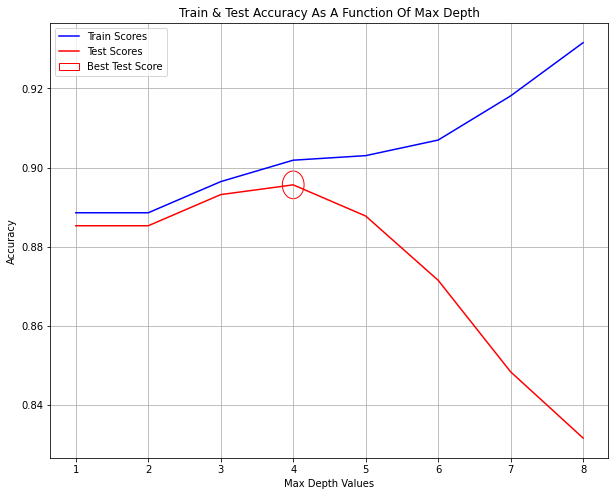

CPU times: user 245 ms, sys: 14.4 ms, total: 259 ms
Wall time: 260 ms


In [275]:
%%time

plt.figure()
plt.plot(train_predictions.keys(), train_predictions.values(), color='b', label='Train Scores')
plt.plot(test_predictions.keys(), test_predictions.values(), color='r', label='Test Scores')

from matplotlib.patches import Ellipse
circle = Ellipse((best_metric_depth, best_score_depth), width=0.3, height=0.007, color='r', fill=False, label='Best Test Score')
fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle)

plt.title('Train & Test Accuracy As A Function Of Max Depth')
plt.xlabel('Max Depth Values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## Min Samples Split

(15 points)

Consider the following min_samples_split values: [1, 5, 10, 20, 50]. For each value, construct a tree and prune it according to the min_samples_split value = don't split a node if the number of sample in it is less or equal to the min_samples_split value. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the min_samples_split. Mark the best result on the graph with red circle. (make sure that the x-axis ticks represent the values of min_samples_split)

In [276]:
%%time
#### Your code here ####
min_samples_split_values =  [1, 5, 10, 20, 50]  # takes about 6 mins
min_samples_split_values_trees_dict = dict()
for value in min_samples_split_values:
    print(f'now building tree with min_samples_split_value {value}')
    min_samples_split_values_trees_dict[value] = build_tree(X_train, calc_entropy, gain_ratio=True, min_samples_split=value, max_depth=1000)

now building tree with min_samples_split_value 1
now building tree with min_samples_split_value 5
now building tree with min_samples_split_value 10
now building tree with min_samples_split_value 20
now building tree with min_samples_split_value 50
CPU times: user 17.5 s, sys: 283 ms, total: 17.7 s
Wall time: 18.8 s


In [277]:
%%time
# predictions training
min_samples_split_values_train_predictions = dict()
for value in min_samples_split_values:
    min_samples_split_values_train_predictions[value] = calc_accuracy(min_samples_split_values_trees_dict[value], X_train)

CPU times: user 1.27 s, sys: 22.8 ms, total: 1.29 s
Wall time: 1.39 s


In [278]:
%%time
# predictions test
min_samples_split_values_test_predictions = dict()
best_score_min_samples_split = 0
best_metric_min_samples_split = None
for value in min_samples_split_values:
    min_samples_split_values_test_predictions[value] = calc_accuracy(min_samples_split_values_trees_dict[value], X_test)
    if min_samples_split_values_test_predictions[value] > best_score_min_samples_split:
        best_score_min_samples_split = min_samples_split_values_test_predictions[value]
        best_metric_min_samples_split = value

CPU times: user 418 ms, sys: 12.6 ms, total: 431 ms
Wall time: 446 ms


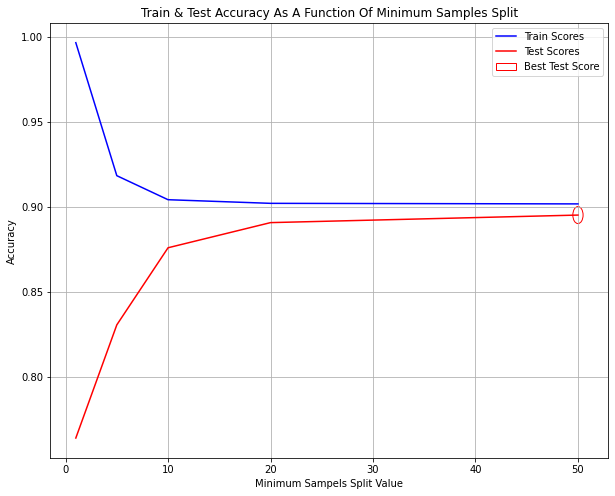

CPU times: user 231 ms, sys: 11.7 ms, total: 242 ms
Wall time: 245 ms


In [279]:
%%time
plt.figure()
plt.plot(min_samples_split_values_train_predictions.keys(), min_samples_split_values_train_predictions.values(), color='b', label='Train Scores')
plt.plot(min_samples_split_values_test_predictions.keys(), min_samples_split_values_test_predictions.values(), color='r', label='Test Scores')

from matplotlib.patches import Ellipse
circle = Ellipse((best_metric_min_samples_split, best_score_min_samples_split), width=1, height=0.01, color='r', fill=False, label='Best Test Score')
fig = plt.gcf()
ax = fig.gca()
ax.add_patch(circle)

plt.title('Train & Test Accuracy As A Function Of Minimum Samples Split')
plt.xlabel('Minimum Sampels Split Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_min_samples_split - the best tree according to min_samples_split pruning

In [280]:
#### Your code here ####

tree_max_depth = trees_dict_depth[best_metric_depth]
tree_min_samples_split = min_samples_split_values_trees_dict[best_metric_min_samples_split]

## Number of Nodes

(5 points)

Complete the function counts_nodes and print the number of nodes in each tree and print the number of nodes of the two trees above

In [281]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if node.is_leaf:
        return 1
    
    # else may have many children
    sum_children = 0
    for child in node.children:
        sum_children += count_nodes(child)
        
    return sum_children + 1  # (plus me)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    

In [282]:
count_nodes(tree_max_depth)

205

In [283]:
count_nodes(tree_min_samples_split)

349

## Print the tree

Complete the function `print_tree`. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [284]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    spacing = " " * depth
    spacing = "| " * depth
    left =  "["
    right = "]"
    
    if node.is_leaf is True:
        if parent_feature == 'ROOT':
            print(f'One node tree ...')
            return
        values, counts = np.unique(node.data[:,-1], return_counts=True)
        predictions = dict(zip(values, counts))
        print(spacing + left + 'X' + str(parent_feature) + '=' + feature_val + ', leaf' + right + ': ' + left + str(predictions) +right) # Bonus:  + f' sample size {node.num_of_samples}'
        return
    
    # else - this is not a leaf
    parent_feature_print = 'ROOT' if parent_feature == 'ROOT' else 'X'+str(parent_feature)+'='+feature_val
    print(spacing + left + parent_feature_print + ', feature=X'  +  str(node.feature) + right) #Bonus: + f' ** depth {node.curr_depth} sample size {node.num_of_samples}'
    depth += 1
    for child in node.children:
        print_tree(
            node=child, 
            depth=depth, 
            parent_feature=node.feature, 
            feature_val=child.split_value
        )
    
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

print the tree with the best test accuracy and with less than 50 nodes (from the two pruning methods)

In [285]:
#### Your code here ####
# %%time

results = []


for depth in depths:
    curr_tree = trees_dict_depth[depth]
    results.append({
        'type': 'max_depth',
        'value': depth,
        'tree': curr_tree,
        'score': calc_accuracy(curr_tree, X_test),        
        'nodes': count_nodes(curr_tree), 
    })


for value in min_samples_split_values:
    curr_tree = min_samples_split_values_trees_dict[value]
    results.append({
        'type': 'min_samples_split',
        'value': value,
        'tree': curr_tree,
        'score': calc_accuracy(curr_tree, X_test),
        'nodes': count_nodes(curr_tree), 
    })


In [286]:
for index, item in enumerate(results):
    print('index', index, item['type'], item['value'], 'score:', item['score'],'nodes:', item['nodes'])

index 0 max_depth 1 score: 0.8852781880846874 nodes: 10
index 1 max_depth 2 score: 0.8852781880846874 nodes: 32
index 2 max_depth 3 score: 0.8931560807483998 nodes: 83
index 3 max_depth 4 score: 0.8956179222058099 nodes: 205
index 4 max_depth 5 score: 0.8877400295420975 nodes: 422
index 5 max_depth 6 score: 0.8714918759231906 nodes: 765
index 6 max_depth 7 score: 0.8483505662235352 nodes: 1184
index 7 max_depth 8 score: 0.8316100443131462 nodes: 1664
index 8 min_samples_split 1 score: 0.7641555883801083 nodes: 3251
index 9 min_samples_split 5 score: 0.8306253077301822 nodes: 1833
index 10 min_samples_split 10 score: 0.8759231905465288 nodes: 1182
index 11 min_samples_split 20 score: 0.8906942392909897 nodes: 729
index 12 min_samples_split 50 score: 0.8951255539143279 nodes: 349


#### We found 2 trees under 50 nodes with the same accuracy - we will print them both

In [287]:
print_tree(
    node=results[0]['tree'], 
    depth=0, 
    parent_feature='ROOT', 
    feature_val='ROOT'
) 

[ROOT, feature=X4]
| [X4=a, leaf]: [{'e': 273, 'p': 31}]
| [X4=c, leaf]: [{'e': 10, 'p': 137}]
| [X4=f, leaf]: [{'e': 170, 'p': 1438}]
| [X4=l, leaf]: [{'e': 272, 'p': 27}]
| [X4=m, leaf]: [{'e': 2, 'p': 25}]
| [X4=n, leaf]: [{'e': 2332, 'p': 344}]
| [X4=p, leaf]: [{'e': 8, 'p': 175}]
| [X4=s, leaf]: [{'e': 38, 'p': 380}]
| [X4=y, leaf]: [{'e': 49, 'p': 382}]


In [288]:
print_tree(
    node=results[1]['tree'], 
    depth=0, 
    parent_feature='ROOT', 
    feature_val='ROOT'
) 

[ROOT, feature=X4]
| [X4=a, feature=X2]
| | [X2=n, leaf]: [{'e': 33, 'p': 5}]
| | [X2=w, leaf]: [{'e': 107, 'p': 7}]
| | [X2=y, leaf]: [{'e': 133, 'p': 19}]
| [X4=c, feature=X6]
| | [X6=c, leaf]: [{'e': 7, 'p': 63}]
| | [X6=w, leaf]: [{'e': 3, 'p': 74}]
| [X4=f, feature=X10]
| | [X10=f, leaf]: [{'e': 14, 'p': 91}]
| | [X10=k, leaf]: [{'e': 134, 'p': 1037}]
| | [X10=s, leaf]: [{'e': 22, 'p': 310}]
| [X4=l, feature=X1]
| | [X1=f, leaf]: [{'e': 19, 'p': 1}]
| | [X1=s, leaf]: [{'e': 94, 'p': 16}]
| | [X1=y, leaf]: [{'e': 159, 'p': 10}]
| [X4=m, feature=X0]
| | [X0=f, leaf]: [{'e': 1, 'p': 8}]
| | [X0=k, leaf]: [{'e': 1, 'p': 10}]
| | [X0=x, leaf]: [{'p': 7}]
| [X4=n, feature=X7]
| | [X7=b, leaf]: [{'e': 2197, 'p': 286}]
| | [X7=n, leaf]: [{'e': 135, 'p': 58}]
| [X4=p, feature=X0]
| | [X0=f, leaf]: [{'e': 7, 'p': 86}]
| | [X0=x, leaf]: [{'e': 1, 'p': 89}]
| [X4=s, feature=X13]
| | [X13=p, leaf]: [{'e': 12, 'p': 190}]
| | [X13=w, leaf]: [{'e': 26, 'p': 190}]
| [X4=y, feature=X1]
| | [X1=s, l